# Data Visualization and Processing
---
By: Kris Ghimire, Thad Schwebke, Walter Lai, and Jamie Vo
<img src="Images/broken-1391025_1280.JPG" alt="Crime" style="width: 80%;"/>
Photo Cred.: Photo by kat wilcox from Pexels

In [1]:
# Load in libraries
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

### Business Understanding (10 pts)
---

#### Purpose of the dataset.
[Homocide Data](https://www.kaggle.com/murderaccountability/homicide-reports)

(i.e., why was this data collected in
the first place?). 

The Murder Accountability Project is a nonprofit organization that discovers discrepancies between the reported homicides between medical examiners and the FBI voluntary crime report. The database is considered to be one of the most exhaustive record collection of homicides that is currently avaiable for the US. Additional information about the organization can be found at [Murder Accountability Project](http://www.murderdata.org/).

The dataset dates back to 1967 and includes demographic information such as gender, age, and ethnicity. A more in depth description of the attributes may be found in the [Data Description](#Data_Description) section.

In [2]:
# read in the data
df = pd.read_csv('../Data/database.csv')

In [3]:
# print the number of records and columns
records = len(df)
attributes = df.columns

print(f'No. of Records: {records} \nNo. of Attributes: {len(attributes)}')

No. of Records: 638454 
No. of Attributes: 24


#### Define and measure the dataset outcomes.
That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset? 

#### Model Statistics
How would you measure the effectiveness of a
good prediction algorithm? Be specific.

### Data Understanding (80 pts total)
---
<a id="Data_Description"></a>
#### [10 points]  Data Description:
Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

Categorical/Binary Variables:

Agency Code has 12003 unique codes.  It represents the code of the agency reporting the homicide.

Agency Name has 9216 unique names.  The top 3 agency names are New York (6.017%), Los Angeles (4.54%) and Chicago (3.34%).

Agency Type describes the type of police agency that reported the homicide with 7 distinct agency types.  The majority of Agency Types that report homicides is Municipal Police which is 77.2219% and Sheriff with 16.4964%.

City describes the city where the homicide occurred.  Homicides were reported from 1782 distinct cities.

State describes the state where the homicide occurred.  Homicides were reported from 51 states.

Month describes the month the homicide occurred.

Crime Type describes whether the homicide was a 'Murder or Manslaughter' (98.5%) or 'Manslaughter By Negligence'.

Crime Solved explains whether the homicide was solved,'Yes'(70.19%), or not solved,'No'.

Victim Sex had values of 'Male','Female' and 'Unknown'.  'Unknown' Sexes comprise 0.1541%.

Victim Race has 5 values: White,Black,Asian/Pacific Islander,Unknown,Native American/Alaska Native.  Most of the victims are 
White 49.7173% or Black 46.9727%.  There are 1.0457% Unknown Races of victims.

Victim Ethnicity had values: 'Unknown' which comprised 57.68% of dataset, 'Not Hispanic' and 'Hispanic'.  Unknown Ethnicities of victim were over half of the reported homicides!

Perpetrator Sex had values: 'Male','Female','Unknown'.  Unknown Perpetrator Sexes were 29.8166% of the dataset.

Perpetrator Race had values: White(34.2%),Black(33.6%),Asian/Pacific Islander,Unknown (30.7%),Native American/Alaska Native.  

Perpetrator Ethnicity was composed of 70% Unknown, 23% Not Hispanic, 7.34% Hispanic.

Relationship most likely describes the victim's relationship to the perpetrator.  See cell below for evidence of this.  It had 28 distinct values: 42.7616% Unknown, 19.7370% Acquaintance, 15.1292% Stranger and some of the other relationships were: Wife, Friend.  The idea to use the Victim and Perpetrator's Sex to determine the meaning of the Relationship variable was taken from R notebook:
kaggle.com/khsamaha/who-killed-who-homicide-reports-1980-2014

Weapons describe what weapon was used and there were 16 discinct weapons with 5.1988% Unknown.

Record Source describes whether the record came from FBI (96.5844%) or FOIA (3.4156%) 

Numeric Variables:

Record ID is the identifier for each reported homicide.

The Year the homicide occurred ranges from earliest of 1980 to latest of 2014.

Victim Count indicates number of victims in the homicide report ranging from 0 to 10.

Perpetrator Count ranges from 0 to 10 indicating the number of perpetrators involved in the homicide.

Incident ?

Victim Age ranged from 0 to 998.  42 years is the 75% percentile.  There are likely some data entry errors for victim age.


In [43]:
categorical_vars=['Agency Code','Agency Name','Agency Type','City','State','Month','Crime Type','Crime Solved','Victim Sex',
                 'Victim Race','Victim Ethnicity','Perpetrator Sex','Perpetrator Race','Perpetrator Ethnicity','Relationship',
                 'Weapon','Record Source']
factor_values=list(map(lambda col_name,df=df:df[col_name].value_counts()/len(df), categorical_vars))
factor_values


[NY03030    0.060170
 CA01942    0.037063
 ILCPD00    0.033410
 MI82349    0.026949
 TXHPD00    0.020175
              ...   
 WY00801    0.000002
 ME01000    0.000002
 WA01404    0.000002
 MO03603    0.000002
 OH07815    0.000002
 Name: Agency Code, Length: 12003, dtype: float64,
 New York                            0.060170
 Los Angeles                         0.045433
 Chicago                             0.033410
 Detroit                             0.026949
 Houston                             0.020434
                                       ...   
 Valley Township                     0.000002
 Canfield                            0.000002
 Fairbury                            0.000002
 University of Tennessee: Memphis    0.000002
 Duke University                     0.000002
 Name: Agency Name, Length: 9216, dtype: float64,
 Municipal Police    0.772219
 Sheriff             0.164964
 County Police       0.035544
 State Police        0.022296
 Special Police      0.004525
 Regional Po

In [63]:
#The idea to use perpetrator and victim sex to determine the meaning of the Relationship variable was taken from 
#kaggle.com/khsamaha/who-killed-who-homicide-reports-1980-2014
print('Number of Females/Males Victims/Perpetrators who had a Relationship Value of Wife:')
print(df[df['Relationship']=='Wife'].groupby(['Perpetrator Sex','Victim Sex'])['Record ID'].count())
print('Number of Females/Males Victims/Perpetrators who had a Relationship Value of Husband:')
print(df[df['Relationship']=='Husband'].groupby(['Perpetrator Sex','Victim Sex'])['Record ID'].count())
print('When a Female is killed the Relationship value is more likely set to Wife.  When a Male is killed the Relationship is more liekly Husband')
print('Therefore Relationship variable most likely indicates victim relationship relative to perpetrator. ')

Number of Females/Males Victims/Perpetrators who had a Relationship Value of Wife:
Perpetrator Sex  Victim Sex
Female           Female           38
                 Male             45
                 Unknown           2
Male             Female        22488
                 Male            568
                 Unknown           2
Unknown          Female           41
                 Male              3
Name: Record ID, dtype: int64
Number of Females/Males Victims/Perpetrators who had a Relationship Value of Husband:
Perpetrator Sex  Victim Sex
Female           Female          29
                 Male          8585
Male             Female          68
                 Male            96
Unknown          Male            25
Name: Record ID, dtype: int64
When a Female is killed the Relationship value is more likely set to Wife.  When a Male is killed the Relationship is more liekly Husband
Therefore Relationship variable most likely indicates victim relationship relative to perpetrator. 


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [70]:
numeric_vars=['Year','Incident','Victim Age','Victim Count','Perpetrator Count']
range_dict={}

mins_maxes=list(map(lambda col_name,df=df:(col_name,df[col_name].min(),df[col_name].max()),numeric_vars))
mins_maxes

[('Year', 1980, 2014),
 ('Incident', 0, 999),
 ('Victim Age', 0, 998),
 ('Victim Count', 0, 10),
 ('Perpetrator Count', 0, 10)]

#### [15 points] Verify data quality: 
Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.

#### [10 points] Statistics:
Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you
found something interesting. Note: You can also use data from other sources for
comparison. Explain the significance of the statistics run and why they are meaningful.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df.describe()


,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


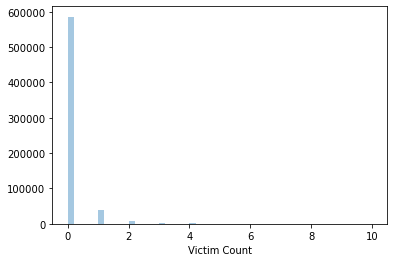

In [10]:
sns.distplot(df['Victim Count'],kde=False)

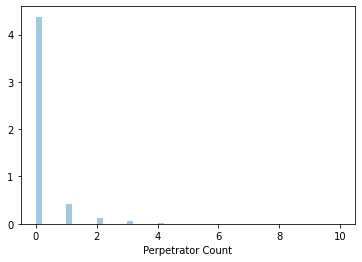

In [12]:
sns.distplot(df['Perpetrator Count'])

#### [15 points] Visualization
Visualize the most important attributes appropriately (at least 5 attributes).
Important: Provide an interpretation for each chart. Explain for each attribute why the
chosen visualization is appropriate.

#### [15 points] EDA
Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.

#### [10 points] Discoveries
Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).

#### [5 points] New Feature Creation
Are there other features that could be added to the data or created from
existing features? Which ones?

#### Exceptional Work (10 points total)
• You have free reign to provide additional analyses.
• One idea: implement dimensionality reduction, then visualize and interpret the results.